<a href="https://colab.research.google.com/github/PThao2931/Fraudulent-Transactions-Analysis/blob/main/Final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

churn_prediction = pd.read_excel('/content/drive/My Drive/churn_prediction.xlsx')
print(churn_prediction.head())

Mounted at /content/drive
   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       52869      0    20.0         Mobile Phone         3              7.0   
1       52942      0    13.0             Computer         1              9.0   
2       52972      0    16.0         Mobile Phone         3              7.0   
3       53125      0     5.0         Mobile Phone         1             16.0   
4       53367      0     9.0         Mobile Phone         1             28.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0             E wallet  Female             4.0                         4   
1     Cash on Delivery  Female             4.0                         4   
2           Debit Card    Male             3.0                         4   
3           Debit Card    Male             3.0                         4   
4           Debit Card  Female             3.0                         4   

     PreferedOrderCat  SatisfactionS

## EDA

In [ ]:
churn_prediction.shape
churn_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
print(churn_prediction.isnull().sum())

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [ ]:
# Xử lý các giá trị bị thiếu
columns_with_missing_values = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
                               'OrderAmountHikeFromlastYear', 'CouponUsed',
                               'OrderCount', 'DaySinceLastOrder']
for column in columns_with_missing_values:
    churn_prediction[column].fillna(churn_prediction[column].median(), inplace=True)

<ipython-input-5-920c98b1ddca>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn_prediction[column].fillna(churn_prediction[column].median(), inplace=True)


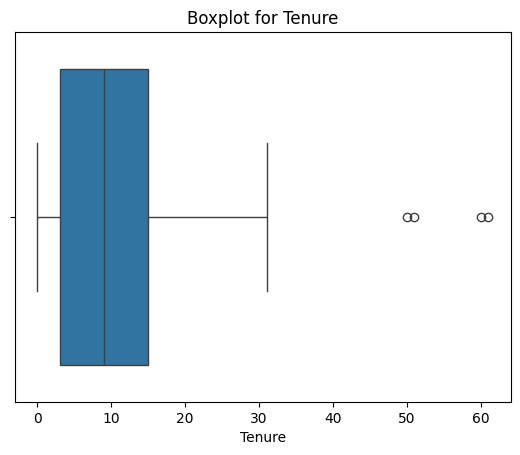

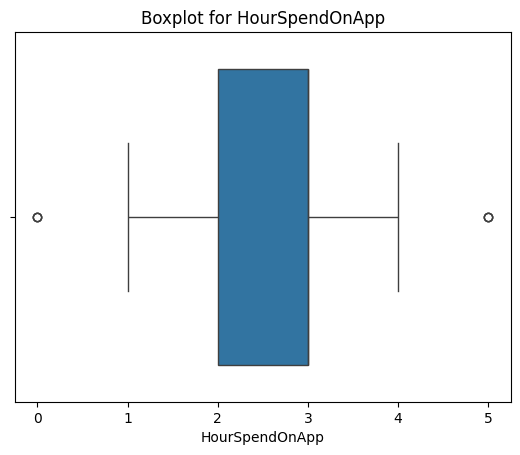

In [ ]:
sns.boxplot(x=churn_prediction['Tenure'])
plt.title('Boxplot for Tenure')
plt.show()

sns.boxplot(x=churn_prediction['HourSpendOnApp'])
plt.title('Boxplot for HourSpendOnApp')
plt.show()

In [ ]:
churn_prediction = pd.get_dummies(churn_prediction, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)

In [ ]:
X = churn_prediction.drop(columns=['Churn', 'CustomerID'])
y = churn_prediction['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


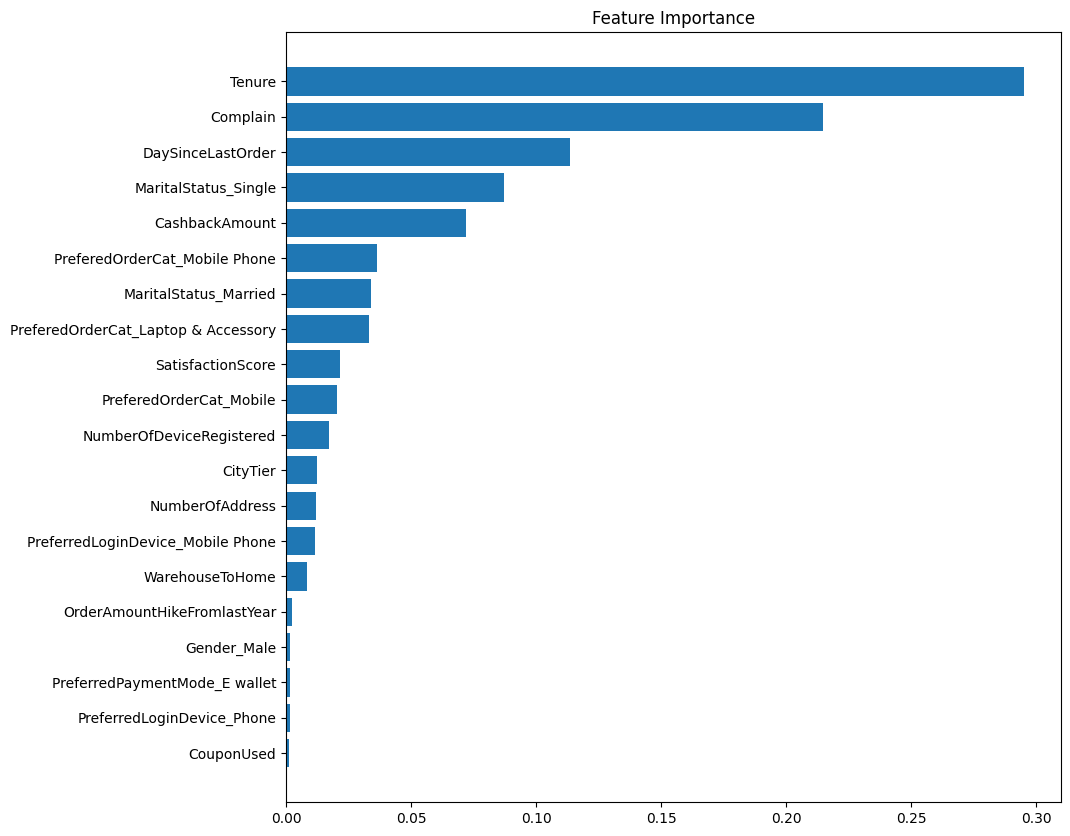

In [ ]:
#Random Forest
clf_rand = RandomForestClassifier(max_depth=2, random_state=0)
clf_rand.fit(X_train, y_train)

# Dự đoán trên dữ liệu kiểm tra
y_ranf_pre_train = clf_rand.predict(X_train)
y_ranf_pre_test = clf_rand.predict(X_test)

# Lấy tầm quan trọng của các feature
feats = {}  # dict để lưu feature_name và feature_importance
for feature, importance in zip(X.columns, clf_rand.feature_importances_):
    feats[feature] = importance  # Thêm tên và giá trị tầm quan trọng

# Chuyển thành DataFrame để dễ thao tác
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
importances = importances.sort_values(by='Gini-importance', ascending=True)  # Sắp xếp theo mức độ quan trọng

# Reset index để đưa vào biểu đồ
importances = importances.reset_index()

# Vẽ biểu đồ thể hiện tầm quan trọng của các feature
plt.figure(figsize=(10, 10))
plt.barh(importances.tail(20)['index'][:20], importances.tail(20)['Gini-importance'])
plt.title('Feature Importance')
plt.show()


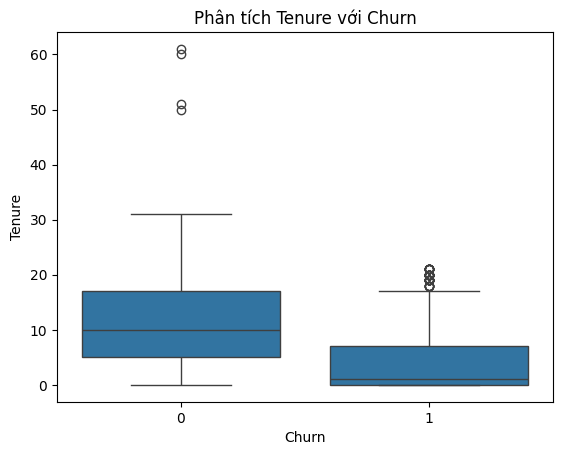

In [ ]:
sns.boxplot(x='Churn', y='Tenure', data=churn_prediction)
plt.title('Phân tích Tenure với Churn')
plt.show()

**=> Khách hàng rời bỏ dịch vụ thường có thời gian sử dụng ngắn hơn so với những người ở lại. Có một số điểm ngoại lệ (outliers) trong dữ liệu về thời gian sử dụng, có thể là từ những khách hàng đã gắn bó rất lâu.**

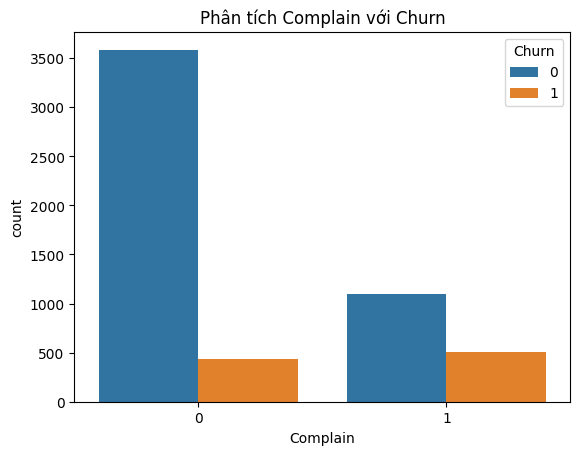

In [ ]:
sns.countplot(x='Complain', hue='Churn', data=churn_prediction)
plt.title('Phân tích Complain với Churn')
plt.show()


**=> Khách hàng đã từng phàn nàn có xu hướng rời bỏ dịch vụ cao hơn so với những người không phàn nàn**

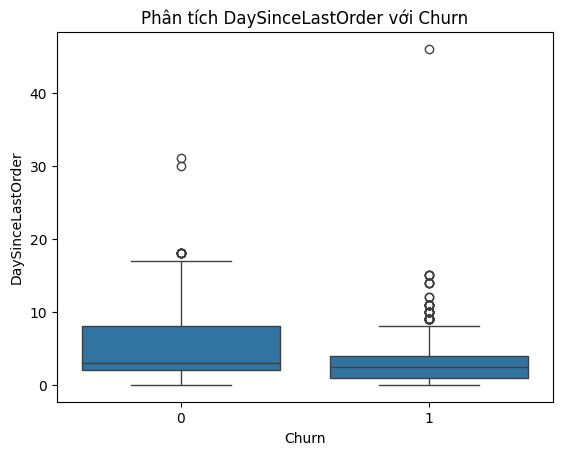

In [ ]:
sns.boxplot(x='Churn', y='DaySinceLastOrder', data=churn_prediction)
plt.title('Phân tích DaySinceLastOrder với Churn')
plt.show()


**=> Tương tự như Tenure, khách hàng rời bỏ dịch vụ có số ngày kể từ lần đặt hàng cuối cùng ít hơn. Điều này cho thấy sự không hoạt động gần đây là một chỉ số mạnh về khả năng rời bỏ.**

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


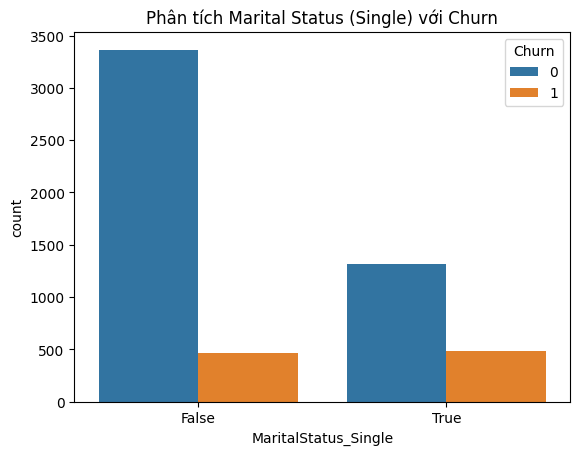

In [ ]:
sns.countplot(x='MaritalStatus_Single', hue='Churn', data=churn_prediction)
plt.title('Phân tích Marital Status (Single) với Churn')
plt.show()


**=>Có sự khác biệt nhẹ về hành vi giữa khách hàng độc thân và không độc thân. Khách hàng độc thân có xu hướng rời bỏ cao hơn một chút.
Mặc dù sự khác biệt không quá rõ ràng, nhưng vẫn có thể đóng góp vào hiệu suất tổng thể của mô hình.**

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


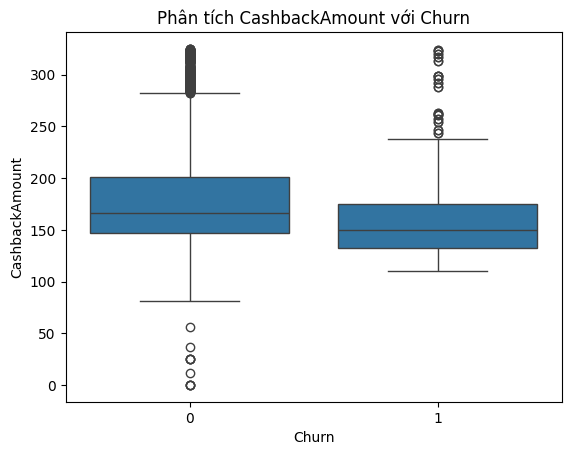

In [ ]:
sns.boxplot(x='Churn', y='CashbackAmount', data=churn_prediction)
plt.title('Phân tích CashbackAmount với Churn')
plt.show()


**=> khách hàng rời bỏ dịch vụ thường nhận được số tiền hoàn lại ít hơn so với những người không rời bỏ.
Tuy nhiên, có nhiều điểm ngoại lệ với giá trị cashback cao. Điều này có thể cho thấy cashback là một yếu tố quan trọng, nhưng có thể cần phải xem xét thêm các yếu tố khác tương tác với nó.**

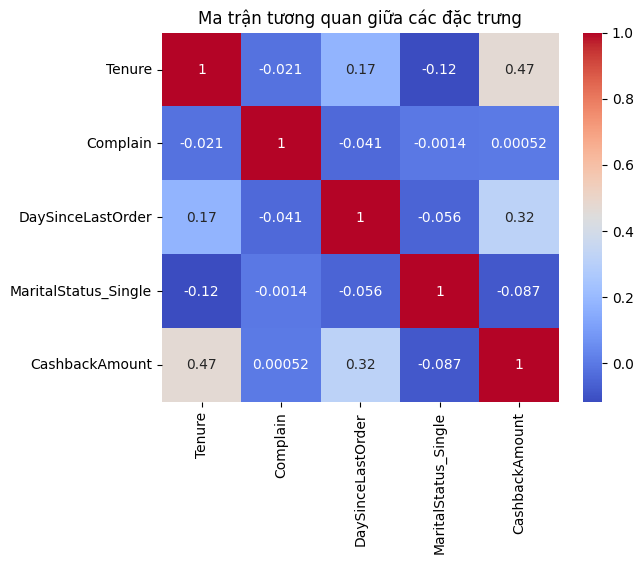

In [ ]:
corr = churn_prediction[['Tenure', 'Complain', 'DaySinceLastOrder', 'MaritalStatus_Single', 'CashbackAmount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Ma trận tương quan giữa các đặc trưng')
plt.show()


**=> Ma trận tương quan cho thấy các đặc trưng không có mức độ tương quan cao với nhau, đây là dấu hiệu tốt vì nó giúp giảm hiện tượng đa cộng tuyến trong mô hình.
Tuy nhiên, CashbackAmount và Tenure có mối tương quan vừa phải (0.47), có thể cần phải theo dõi thêm.**

# 2. Build the Machine Learning model for predicting churned users.

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Đánh giá mô hình
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.96      0.93       929
           1       0.76      0.53      0.62       197

    accuracy                           0.89      1126
   macro avg       0.83      0.75      0.78      1126
weighted avg       0.88      0.89      0.88      1126



In [ ]:
from sklearn.model_selection import GridSearchCV

# Tạo dictionary tham số
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'C': 0.1, 'solver': 'lbfgs'}


In [ ]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Đánh giá mô hình
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.90      0.97      0.93       929
           1       0.76      0.51      0.61       197

    accuracy                           0.89      1126
   macro avg       0.83      0.74      0.77      1126
weighted avg       0.88      0.89      0.88      1126



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Xây dựng mô hình Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình Random Forest
print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97       929
           1       0.93      0.82      0.87       197

    accuracy                           0.96      1126
   macro avg       0.95      0.90      0.92      1126
weighted avg       0.96      0.96      0.96      1126



**=> Chọn Random Forest có kết quả tốt hơn đáng kể trong cả việc dự đoán chính xác các mẫu của lớp 0 và lớp 1, đặc biệt là tăng cường Recall cho lớp 1, giúp mô hình ít bỏ sót các mẫu quan trọng**

- Nhóm có Tenure ngắn: Đưa ra chương trình khuyến mãi hấp dẫn để giữ chân.
- Nhóm có nhiều Complain: Tập trung vào cải thiện dịch vụ chăm sóc khách hàng và hỗ trợ.
- Nhóm có DaySinceLastOrder cao: Khuyến khích khách hàng quay lại bằng các chiến dịch marketing cá nhân hóa.

# 3. Based on the behaviors of churned users, the company would like to offer some special promotions for them

In [ ]:
# Lọc dữ liệu của những người đã rời bỏ
churned_users = churn_prediction[churn_prediction['Churn'] == 1]

In [ ]:
# Lựa chọn các đặc trưng quan trọng để phân cụm
features = churned_users[['Tenure', 'Complain', 'DaySinceLastOrder', 'MaritalStatus_Single', 'CashbackAmount']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


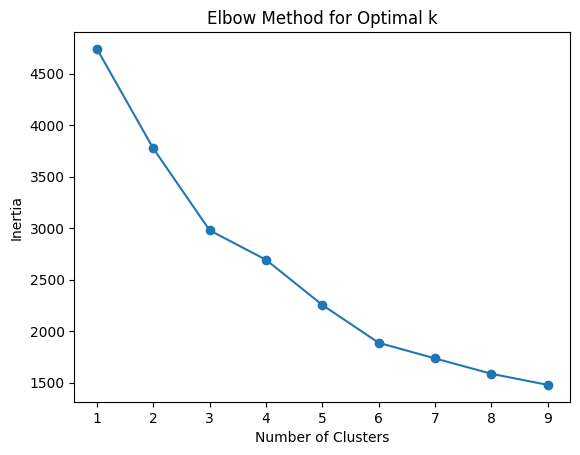

In [ ]:
from sklearn.cluster import KMeans

# Sử dụng Elbow Method để tìm số cụm phù hợp
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
# Phân cụm
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
churned_users['Cluster'] = kmeans.fit_predict(features_scaled)


<ipython-input-17-7065bbcf5f05>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churned_users['Cluster'] = kmeans.fit_predict(features_scaled)


In [ ]:
# Phân tích đặc trưng của từng nhóm
cluster_analysis = churned_users.groupby('Cluster').mean()
print(cluster_analysis)


           CustomerID  Churn     Tenure  CityTier  WarehouseToHome  \
Cluster                                                              
0        52982.783784    1.0  11.297297  2.027027        14.432432   
1        52692.223810    1.0   2.361905  1.590476        17.509524   
2        52749.871148    1.0   1.683473  1.857143        16.549020   
3        52911.454545    1.0  14.500000  1.945455        17.245455   
4        52675.470085    1.0   2.346154  1.905983        16.940171   

         HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
Cluster                                                                
0              2.810811                  3.945946           3.459459   
1              2.971429                  3.942857           3.209524   
2              2.915966                  3.957983           3.742297   
3              3.045455                  3.918182           2.963636   
4              3.017094                  3.897436           3.205128   

    

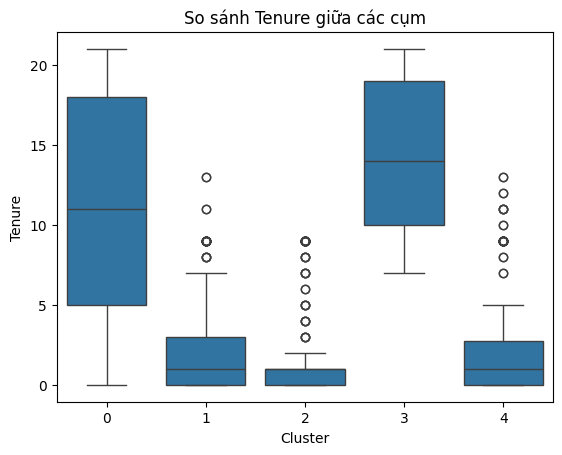

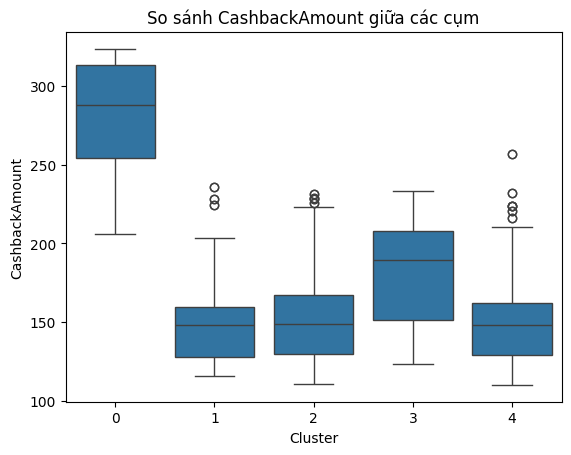

In [ ]:
# Biểu đồ boxplot để so sánh các đặc trưng giữa các cụm
sns.boxplot(x='Cluster', y='Tenure', data=churned_users)
plt.title('So sánh Tenure giữa các cụm')
plt.show()

sns.boxplot(x='Cluster', y='CashbackAmount', data=churned_users)
plt.title('So sánh CashbackAmount giữa các cụm')
plt.show()


Dựa vào hai biểu đồ **boxplot** về **Tenure** và **CashbackAmount** giữa các cụm người dùng rời bỏ dịch vụ, dưới đây là một số gợi ý **chương trình khuyến mãi đặc biệt** nhằm giữ chân và thu hút lại khách hàng:

---

### **1. Nhận xét**  
#### Về **Tenure** (Biểu đồ 1):  
- Cụm **0** và **3** có **Tenure** cao hơn hẳn, nghĩa là nhóm này đã gắn bó với công ty lâu dài hơn.  
- Cụm **1, 2 và 4** có **Tenure** thấp, cho thấy nhóm khách hàng này chỉ sử dụng dịch vụ trong thời gian ngắn trước khi rời bỏ.  

#### Về **CashbackAmount** (Biểu đồ 2):  
- Cụm **0** có **CashbackAmount** cao vượt trội so với các cụm còn lại.  
- Cụm **1, 2, 3 và 4** có **CashbackAmount** thấp hơn và ít biến động.

---

### **2. Gợi ý chương trình khuyến mãi**  
#### Đối với **Cụm 0 và 3** (Tenure cao hoặc giá trị cao):  
- **Chương trình tri ân khách hàng lâu năm**: Tặng thêm cashback hoặc ưu đãi độc quyền (ví dụ: "Cảm ơn bạn đã đồng hành cùng chúng tôi! Nhận ngay 15% cashback cho lần mua tiếp theo.").  
- **Thẻ thành viên VIP**: Giảm giá hoặc miễn phí các dịch vụ đặc biệt nhằm giữ chân nhóm khách hàng giá trị cao này.  
- **Khuyến mãi cá nhân hóa**: Dựa trên hành vi sử dụng trước đây để gửi ưu đãi phù hợp nhất.  

#### Đối với **Cụm 1, 2 và 4** (Tenure thấp và Cashback thấp):  
- **Khuyến mãi chào mừng trở lại**: Tặng cashback ngay lập tức để khuyến khích họ quay lại (ví dụ: "Đừng bỏ lỡ! Nhận ngay 20% cashback khi bạn quay lại sử dụng dịch vụ.").  
- **Ưu đãi ngắn hạn**: Giảm giá giới hạn thời gian hoặc các chương trình khuyến mãi hấp dẫn để tái kích hoạt nhóm khách hàng này.  
- **Chương trình giới thiệu bạn bè**: Khuyến khích họ giới thiệu người mới và nhận thưởng khi người bạn đó sử dụng dịch vụ.  

---

### **3. Chiến lược chung**  
- Phân tích lý do vì sao nhóm khách hàng ở **Cụm 1, 2 và 4** rời bỏ sớm để cải thiện dịch vụ và giảm tỷ lệ rời bỏ.  
- Tăng cường chăm sóc và tặng ưu đãi cho **Cụm 0** để giữ chân nhóm khách hàng có giá trị cao.  

Những chương trình trên sẽ giúp công ty thiết kế các **khuyến mãi phù hợp** nhằm **tăng cường lòng trung thành** và **thu hút lại khách hàng rời bỏ**.





